In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['deliveries.csv', 'matches.csv']


In [2]:
data=pd.read_csv('../input/matches.csv')

<center><font size=4><b>Total no. of wins by each team</b></font></center>

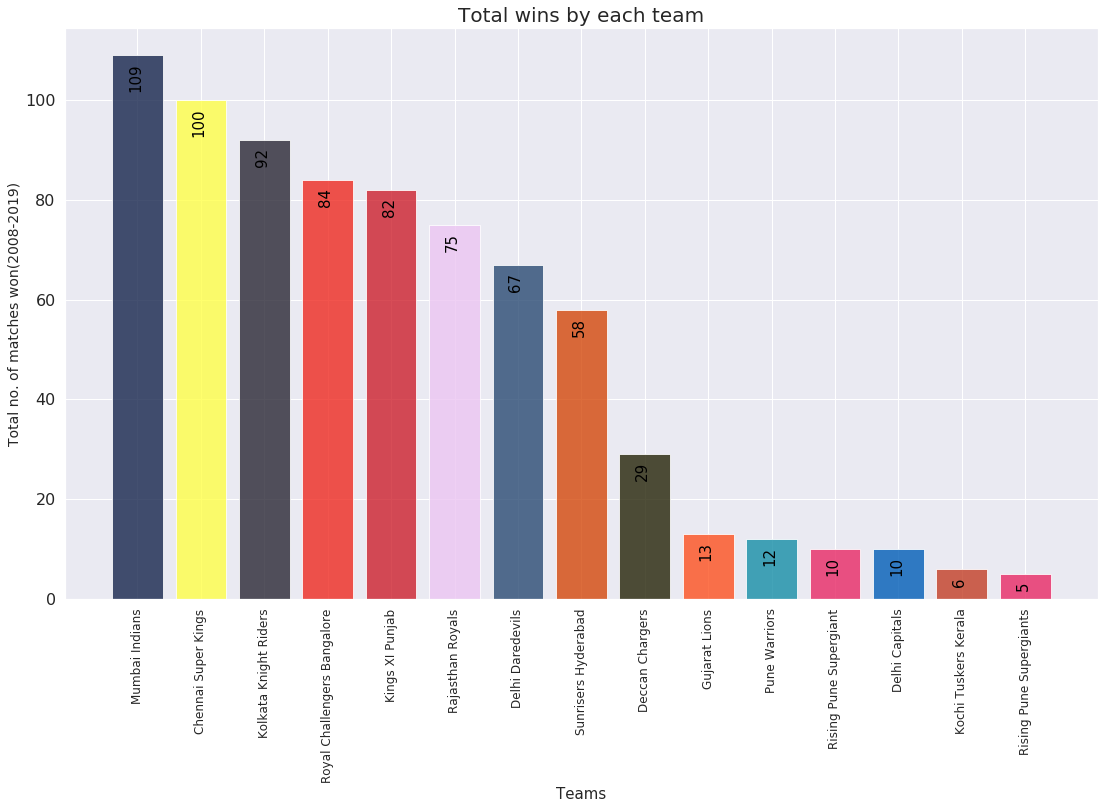

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()


<center><font size=4><b>Top 20 players with most MOM awards</b></font></center>

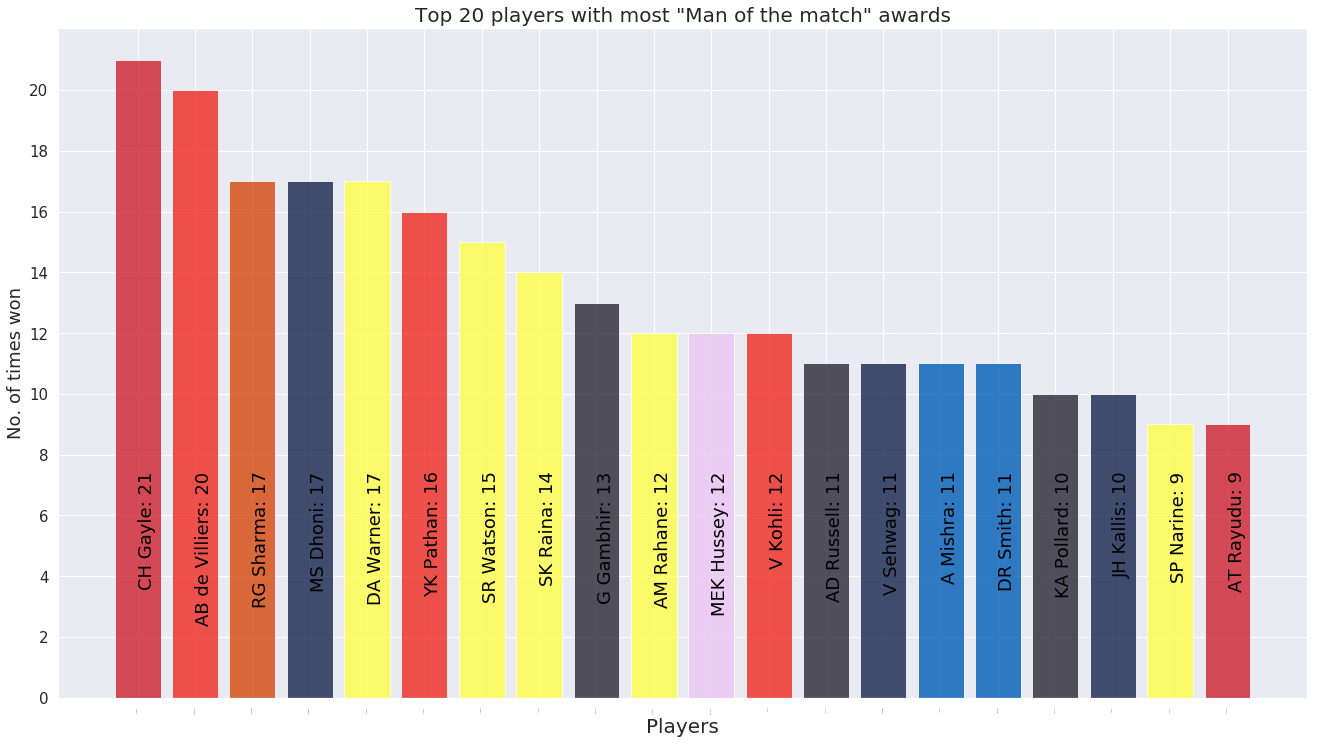

In [4]:
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

<center><font size=4><b>Eliminating redundancy</b></font></center>
* There were two entries for the same city as 'Bangalore' and 'Bengaluru'

In [5]:
data.at[data['city']=='Bengaluru','city']='Bangalore'

<center><font size=4><b>Matches hosted in each city</b></font></center>
* Mumbai has hosted most no. of matches by far(101).
* As expected, top 8 cities are home grounds for the teams.

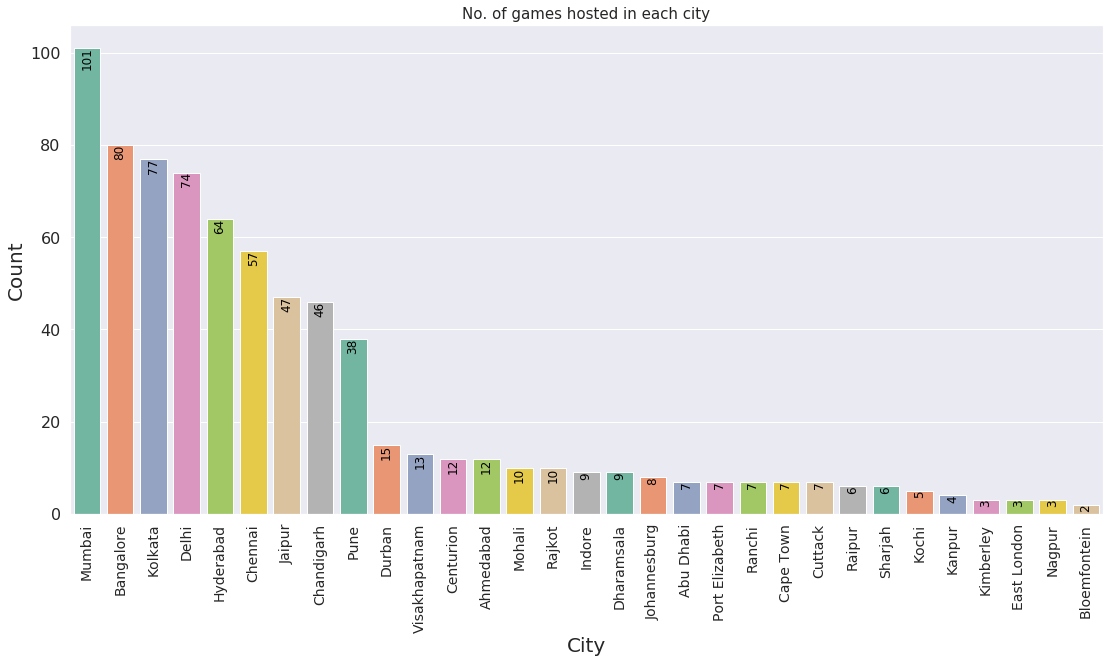

In [6]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data['city'],order=data['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(data['city'].value_counts())
cities['name']=data['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()


<center><font size=4><b>No. of matches hosted at each stadium</b></font></center>
* Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)
* Wankhede and Chinnaswamy tied at no. 2 with 73 matches each.

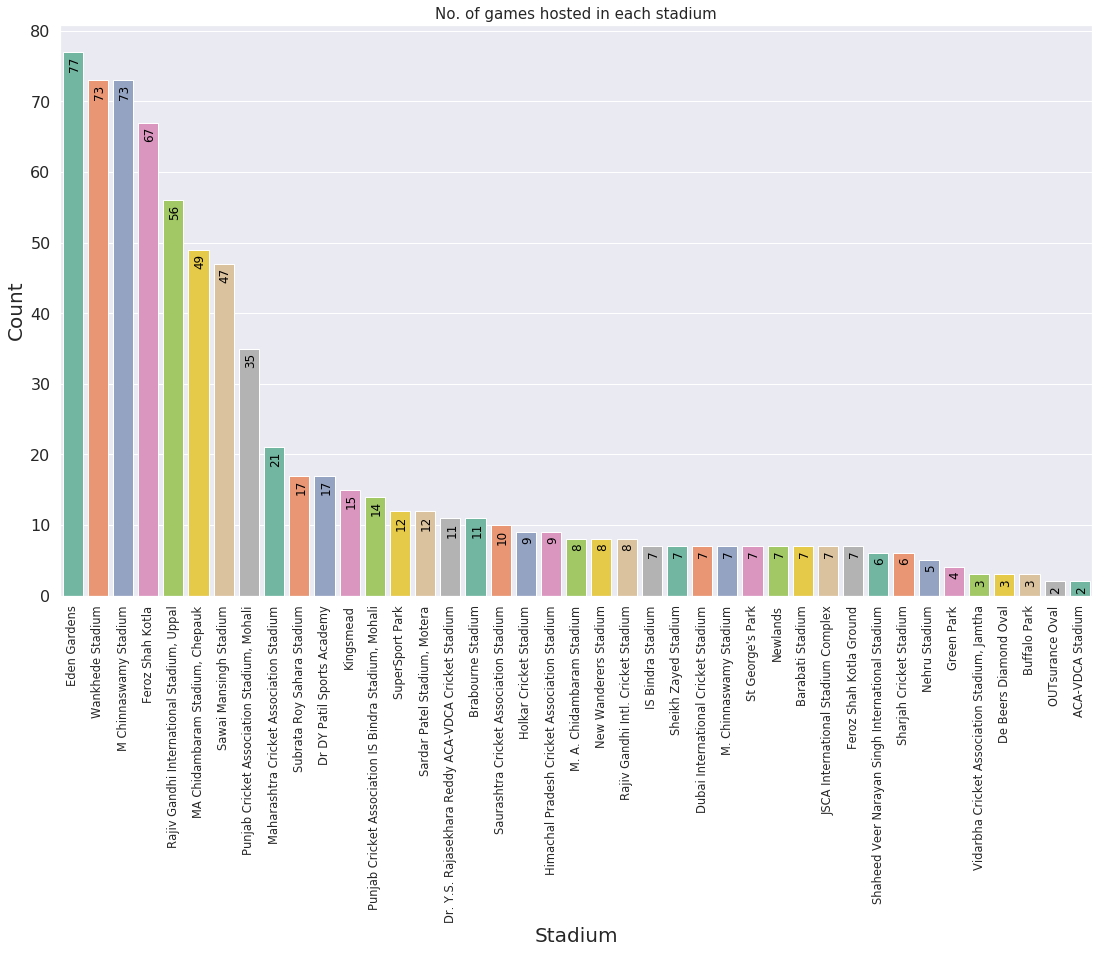

In [7]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(data['venue'],order=data['venue'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(data['venue'].value_counts())
venues['name']=data['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

In [8]:
micsk=data[np.logical_or(np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Chennai Super Kings'),np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Chennai Super Kings'))]

<center><font size=4><b>MI vs CSK head to head</b></font></center>

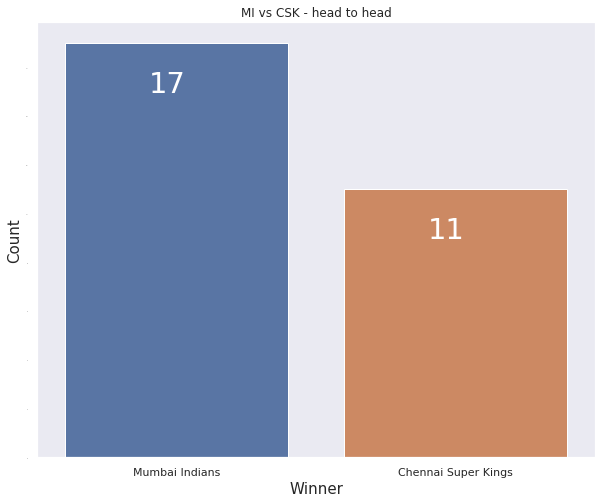

In [9]:

sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index)
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()


<center><font size=4><b>MI vs CSK - Best performers</b></font></center>

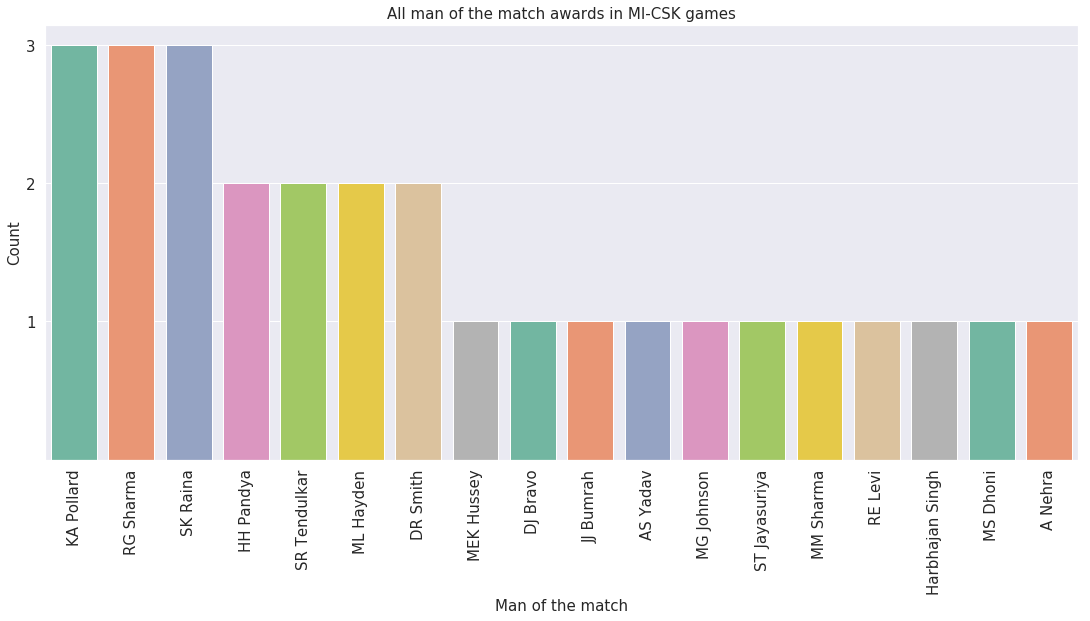

In [10]:

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'],order=micsk['player_of_match'].value_counts().index,palette='Set2')
plt.title('All man of the match awards in MI-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


<center><font size=4><b>Toss decision statistics for all MIvCSK matches - Venue wise</b></font></center>

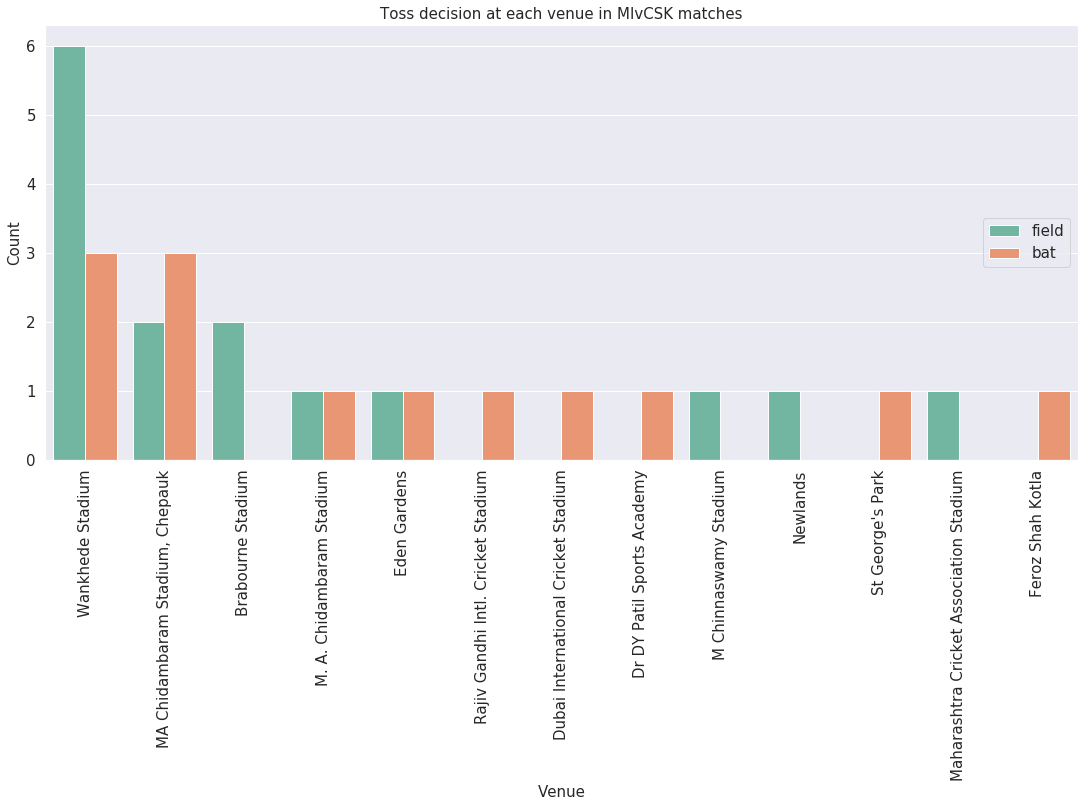

In [11]:

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order=micsk['venue'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision at each venue in MIvCSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()


<center><font size=4><b>Decision upon winning the toss by both teams</b></font></center>
* MI tends to bat first(53% of the times)
* CSK tends to bowl first(62% of the times)

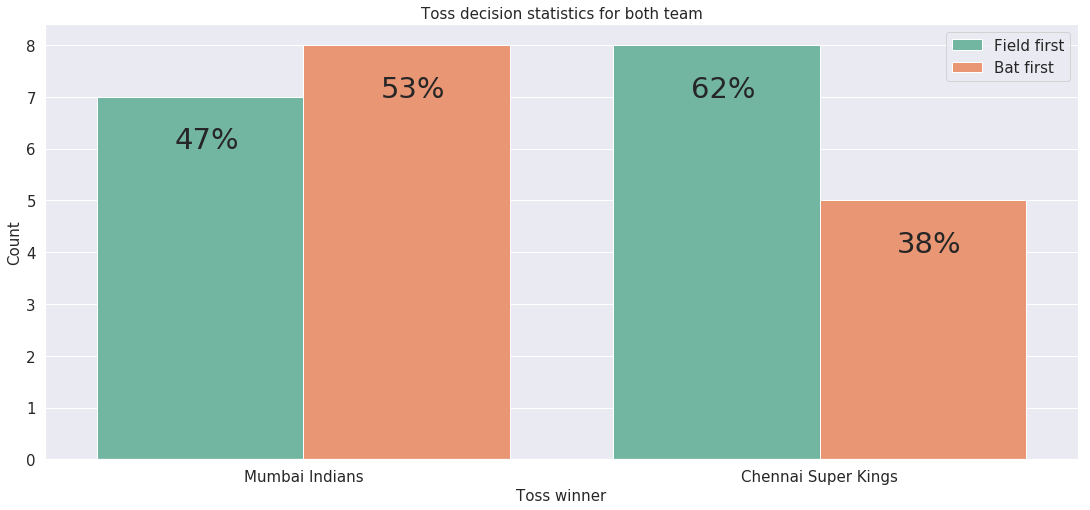

In [12]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set2',hue=data['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()


<center><font size=4><b>Season wise match summary of matches won by runs</b></font></center>

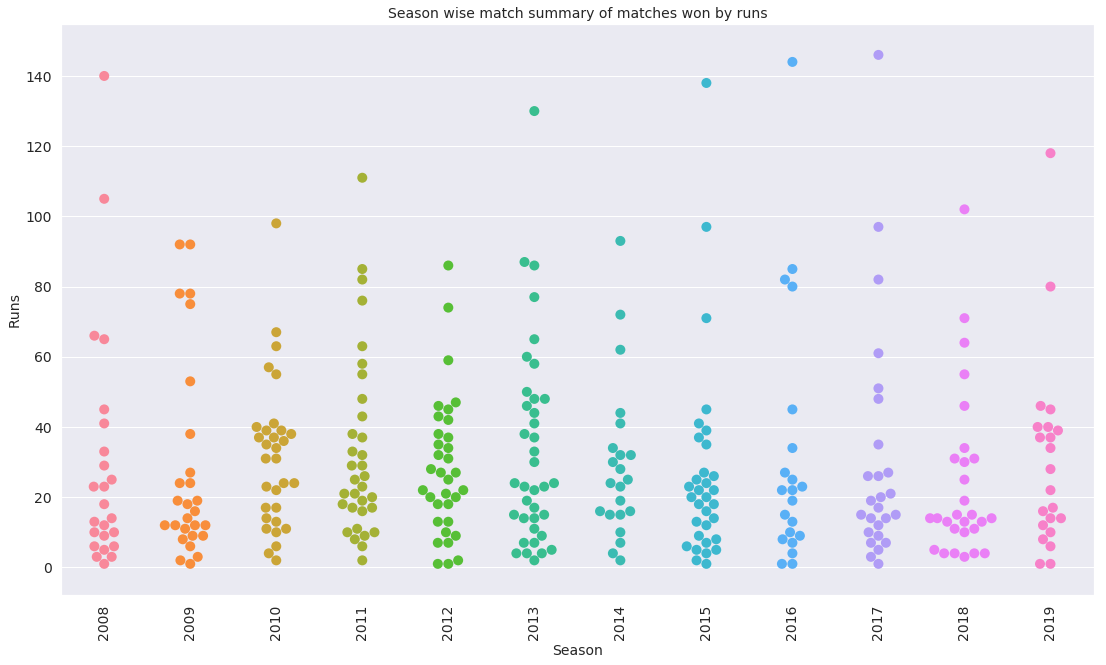

In [13]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(data['season'],data[data['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()


<center><font size=4><b>Biggest win by runs each season</b></font></center>

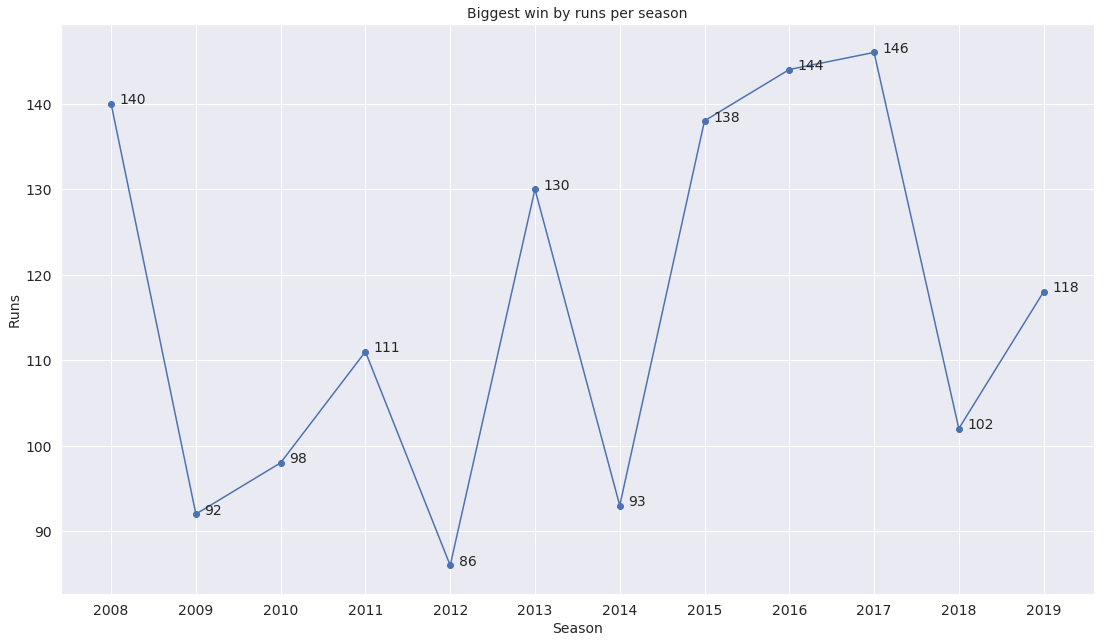

In [14]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(data[data['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()


<center>Upvotes & feedbacks appreciated!</center>